# matplotlib exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Q1: planetary positions

The distances of the planets from the Sun (technically, their semi-major axes) are:

In [2]:
a = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48])

These are in units where the Earth-Sun distance is 1 (astronomical units).

The corresponding periods of their orbits (how long they take to go once around the Sun) are, in years

In [3]:
P = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09])

Finally, the names of the planets corresponding to these are:

In [4]:
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", 
         "Uranus", "Neptune", "Pluto"]

(technically, pluto isn't a planet anymore, but we still love it :)

  * Plot as points, the periods vs. distances for each planet on a log-log plot.

  * Write the name of the planet next to the point for that planet on the plot

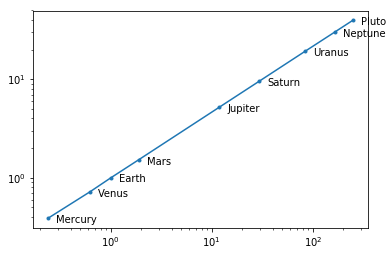

In [5]:
plt.plot(P, a, marker='.')
plt.loglog()

for n, (x, y) in enumerate(zip(P, a)):
    plt.text(x*1.2, y*0.9, names[n]) # scaling by a constant will offset by constant distance in loglog plot

## Q2: drawing a circle

For an angle $\theta$ in the range $\theta \in [0, 2\pi]$, the polar equations of a circle of radius $R$ are:
$$
x = R\cos(\theta)
$$
$$ 
y = R\sin(\theta)
$$

We want to draw a circle.   

  * Create an array to hold the theta values&mdash;the more we use, the smoother the circle will be
  * Create `x` and `y` arrays from `theta` for your choice of $R$
  * Plot `y` vs. `x`
  
Now, look up the matplotlib `fill()` function, and draw a circle filled in with a solid color.

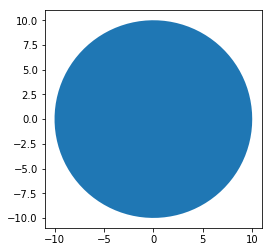

In [6]:
from scipy.constants import pi

R = 10.

theta = np.linspace(0, 2*pi, 100)
x = R*np.cos(theta)
y = R*np.sin(theta)

plt.fill(x, y)
plt.gca().set_aspect(1)

## Q3: Circles, circles, circles...

Generalize your circle drawing commands to produce a function, 
```
draw_circle(x0, y0, R, color)
```
that draws the circle.  Here, `(x0, y0)` is the center of the circle, `R` is the radius, and `color` is the color of the circle.  

Now randomly draw 10 circles at different locations, with random radii, and random colors on the same plot.

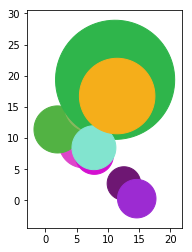

In [7]:
from scipy.constants import pi

def draw_circle(x0, y0, R, color):
    theta = np.linspace(0, 2*pi, 100)
    x = x0 + R*np.cos(theta)
    y = y0 + R*np.sin(theta)

    plt.fill(x, y, color=color)
    plt.gca().set_aspect(1)

for n in range(10):
    x0, y0 = 20*np.random.random((2,))
    r, g, b = np.random.random((3,))
    R = 10*np.random.random((1,))
    draw_circle(x0=x0, y0=y0, color=(r,g,b), R=R)

## Q4: Climate

Download the data file of global surface air temperature averages from here:
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt (also available downloaded in `nasa-giss.txt`)

(this data comes from: https://data.giss.nasa.gov/gistemp/graphs/)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the NumPy `where()` function useful.

In [8]:
!head nasa-giss.txt

# Global annual mean surface air temperature change
# from: https://data.giss.nasa.gov/gistemp/graphs/
#
# Land-Ocean Temperature Index (C)
#---------------------------------
#
# Year No_Smoothing  Lowess(5)
#-----------------------------
1880     -0.20     -0.12
1881     -0.11     -0.15


In [9]:
# use "unpack=True" so that we can unpack the data as a list
data = np.loadtxt('nasa-giss.txt', unpack=True)
year, T_no_smoothing, T_smoothed = data

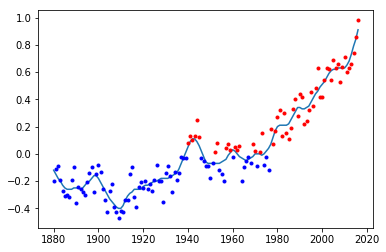

In [10]:
plt.plot(year, T_smoothed)
m = T_no_smoothing < 0.0
plt.plot(year[m], T_no_smoothing[m], linestyle='', color='blue', marker='.')
plt.plot(year[~m], T_no_smoothing[~m], linestyle='', color='red', marker='.')

## Q5: subplots

matplotlib has a number of ways to create multiple axes in a figure -- look at `plt.subplot()` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

Create an `x` array using NumPy with a number of points, spanning from $[0, 2\pi]$.  

Create 3 axes vertically, and do the following:

* Define a new numpy array `f` initialized to a function of your choice.
* Plot f in the top axes
* Compute a numerical derivative of `f`,
   $$ f' = \frac{f_{i+1} - f_i}{\Delta x}$$
  and plot this in the middle axes
* Do this again, this time on $f'$ to compute the second derivative and plot that in the bottom axes


In [11]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

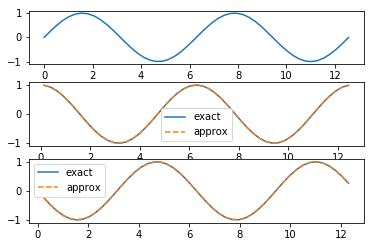

In [12]:
x = np.linspace(0, 4*3.14, 50)
f = np.sin(x)

ax1 = plt.subplot(3, 1, 1)
ax1.plot(x, f)
ax1.set_aspect(1)

df = f[1:] - f[:-1]
dx = x[1:] - x[:-1]
dfdx = df/dx

ax2 = plt.subplot(3, 1, 2)
x_c = 0.5*(x[1:] + x[:-1])
ax2.plot(x_c, np.cos(x_c), label='exact')
ax2.plot(x_c, dfdx, label='approx', linestyle="--")
plt.legend()

# d^2f/dx^2 = d/dx(df/dx)

df2 = dfdx[1:] - dfdx[:-1]
dx2 = x_c[1:] - x_c[:-1]
df2dx2 = df2/dx2

x_c2 = 0.5*(x_c[1:] + x_c[:-1])

ax3 = plt.subplot(3, 1, 3)
ax3.plot(x_c2, -np.sin(x_c2), label='exact')
ax3.plot(x_c2, df2dx2, label='approx', linestyle="--")
plt.legend()

## Q6: frequent words plotting

In this exercise, we will read the file with the transcription of _Star Trek TOS, Shore Leave_ and calculate the amount of time each word was found. We will then plot the 25 most frequent words and label the plot.

### 6.1 Read the file and create the dictionaty {'word':count}

   * Open the `shore_leave.txt`
   * Create the dictionary of the form {'word':count}, where `count` shows the amount of times the word was found in the text. Remember to get rid of the punctuation ("." and ",") and to ensure that all words are lowercase

In [13]:
f = open("shore_leave.txt", "r")

word_counts = {}

for line in f:
    for word in line.split(' '):
        word_cleaned = word.lower().strip().strip('.').strip(',')
        if word_cleaned in word_counts:
            word_counts[word_cleaned] += 1
        else:
            word_counts[word_cleaned] = 1

### 2. Plot 25 most frequent words

Plot a labelled bar chart of the most frequent 25 words with their frequencies.

<BarContainer object of 25 artists>

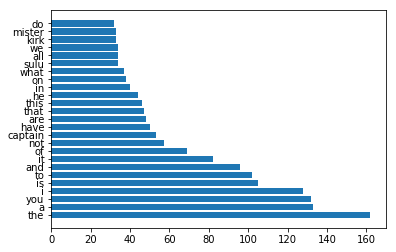

In [14]:
words = np.array(list(word_counts.keys()))
counts = np.array(list(word_counts.values()))

idx_most_frequent = np.argsort(counts)[::-1]

idx_top25 = idx_most_frequent[:25]

plt.barh(words[idx_top25], counts[idx_top25])

## Q7: Mandelbrot set

The mandelbrot set is defined such that $z_{k+1} = z_k^2 + c$
remains bounded, which is usually taken as $|z_{k+1}| <= 2$
where $c$ is a complex number and we start with $z_0 = 0$

We want to consider a range of $c$, as complex numbers $c = x + iy$,
where $-2 < x < 2$ and $-2 < y < 2$.

For each $c$, identify its position on a Cartesian grid as $(x,y)$ and 
assign a value $N$ that is the number of iterations, $k$, required for $|z_{k+1}|$ to become greater than $2$.

The plot of this function is called the Mandelbrot set.



In [15]:
nx = ny = 400

mandelbrot = np.empty((nx, ny))

# we use np.vectorize so that the function is called with 
# each (x, y)-pair in turn and can therefor be vectorized
@np.vectorize
def calc_mandelbrot(c):
    def fn(z, N):
        z_squared = z*z.conjugate()

        if abs(z) > 2:  # 2^2
            return float(N)
        elif N > 100:
            return np.nan
        else:
            z_new = z**2. + c
            return fn(z_new, N+1)
        
    return fn(z=0., N=0)

x_ = np.linspace(-2., 2., nx)
y_ = np.linspace(-2., 2., ny)

x, y = np.meshgrid(x_, y_)

c = x + 1j*y
N = calc_mandelbrot(c)

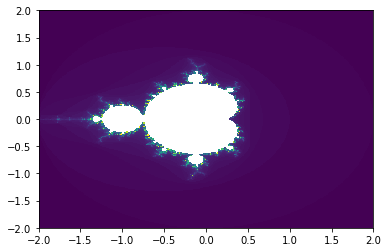

In [16]:
plt.pcolormesh(x, y, N)